In [1]:
import scanpy as sc
import os
os.chdir('/home/erboone/pipeline')

In [2]:
INPUT_H5AD = ['/home/erboone/pipeline/_output/B2_Preproc/Ren35.h5ad',
 '/home/erboone/pipeline/_output/B2_Preproc/Ren36.h5ad',
 '/home/erboone/pipeline/_output/B2_Preproc/Ren37.h5ad',
 '/home/erboone/pipeline/_output/B2_Preproc/Ren38.h5ad',
 '/home/erboone/pipeline/_output/B2_Preproc/Ren39.h5ad',
 '/home/erboone/pipeline/_output/B2_Preproc/Ren40.h5ad',
 '/home/erboone/pipeline/_output/B2_Preproc/Ren41.h5ad',
 '/home/erboone/pipeline/_output/B2_Preproc/Ren42.h5ad']

In [116]:
adata = sc.read_h5ad("/home/erboone/pipeline/_output/B2_Preproc/Ren40.h5ad")

In [29]:
from banksy.main import median_dist_to_nearest_neighbour

# set params
# ==========
plot_graph_weights = True
k_geom = 15 # only for fixed type
max_m = 1 # azumithal transform up to kth order
nbr_weight_decay = "scaled_gaussian" # can also be "reciprocal", "uniform" or "ranked"
coord_keys = ('center_x', 'center_y', 'X_spatial')
# Find median distance to closest neighbours, the median distance will be `sigma`
nbrs = median_dist_to_nearest_neighbour(adata, key=coord_keys[2])


Median distance to closest cell = 13.650254880755355

---- Ran median_dist_to_nearest_neighbour in 0.41 s ----




Median distance to closest cell = 13.650254880755355

---- Ran median_dist_to_nearest_neighbour in 0.45 s ----

---- Ran generate_spatial_distance_graph in 0.97 s ----

---- Ran row_normalize in 0.36 s ----

---- Ran generate_spatial_weights_fixed_nbrs in 3.65 s ----

----- Plotting Edge Histograms for m = 0 -----

Edge weights (distances between cells): median = 43.77317249360131, mode = 1.8315837103314911

---- Ran plot_edge_histogram in 0.03 s ----


Edge weights (weights between cells): median = 0.057713240098461814, mode = 0.021575822787882774

---- Ran plot_edge_histogram in 0.03 s ----

---- Ran generate_spatial_distance_graph in 1.52 s ----

---- Ran theta_from_spatial_graph in 0.94 s ----

---- Ran row_normalize in 0.35 s ----

---- Ran generate_spatial_weights_fixed_nbrs in 5.23 s ----

----- Plotting Edge Histograms for m = 1 -----

Edge weights (distances between cells): median = 62.54504267936315, mode = 1.8315837103314911

---- Ran plot_edge_histogram in 0.05 s ----



/home/erboone/miniforge3/envs/pipebase/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/erboone/miniforge3/envs/pipebase/lib/python3.11/site-packages/numpy/lib/histograms.py:839: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/erboone/miniforge3/envs/pipebase/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6857: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16
/home/erboone/miniforge3/envs/pipebase/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)



Edge weights (weights between cells): median = (-8.141164449770649e-07+0.016901181104328193j), mode = -0.018981558006446617

---- Ran plot_edge_histogram in 0.17 s ----

----- Plotting Weights Graph -----
Maximum weight: 0.21575822787882776

---- Ran plot_graph_weights in 13.04 s ----

Maximum weight: (0.09871948828250418-0.005681205484540915j)

---- Ran plot_graph_weights in 27.76 s ----

----- Plotting theta Graph -----


/home/erboone/miniforge3/envs/pipebase/lib/python3.11/site-packages/matplotlib/collections.py:423: ComplexWarning: Casting complex values to real discards the imaginary part
  renderer.draw_path_collection(


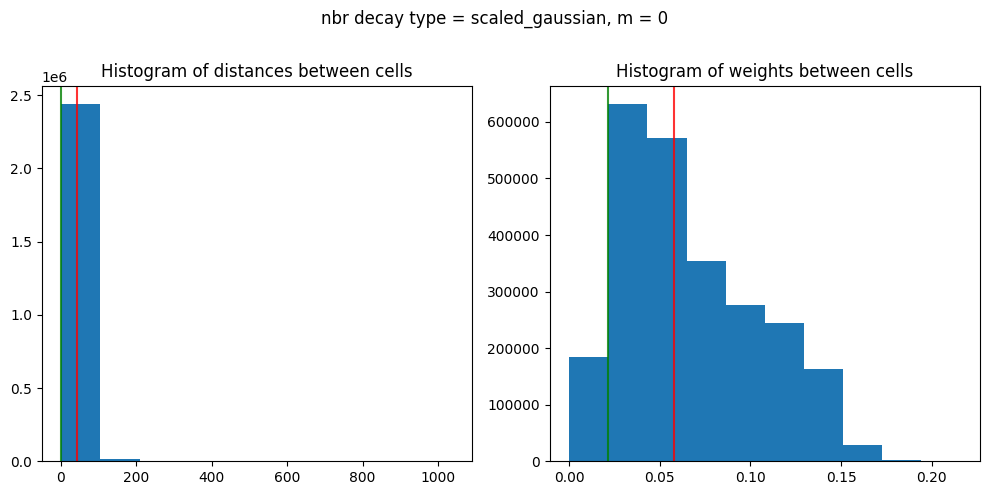

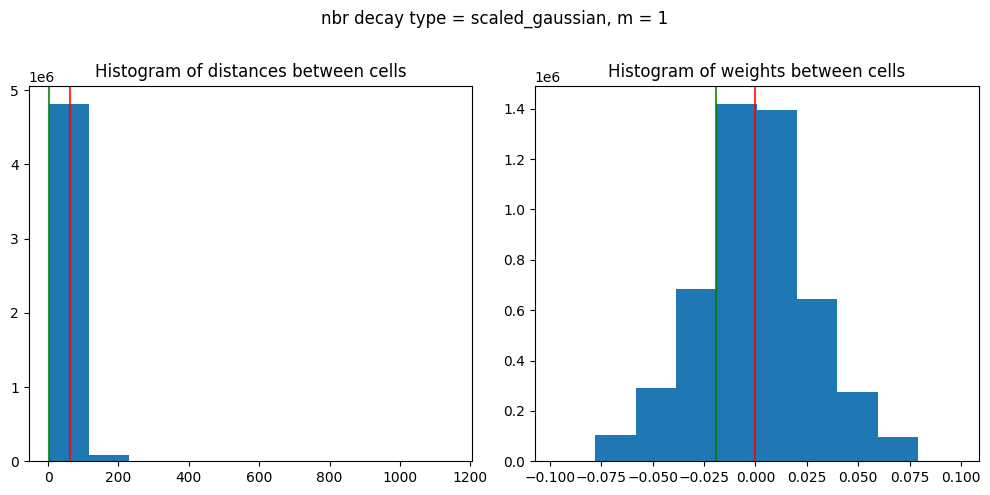

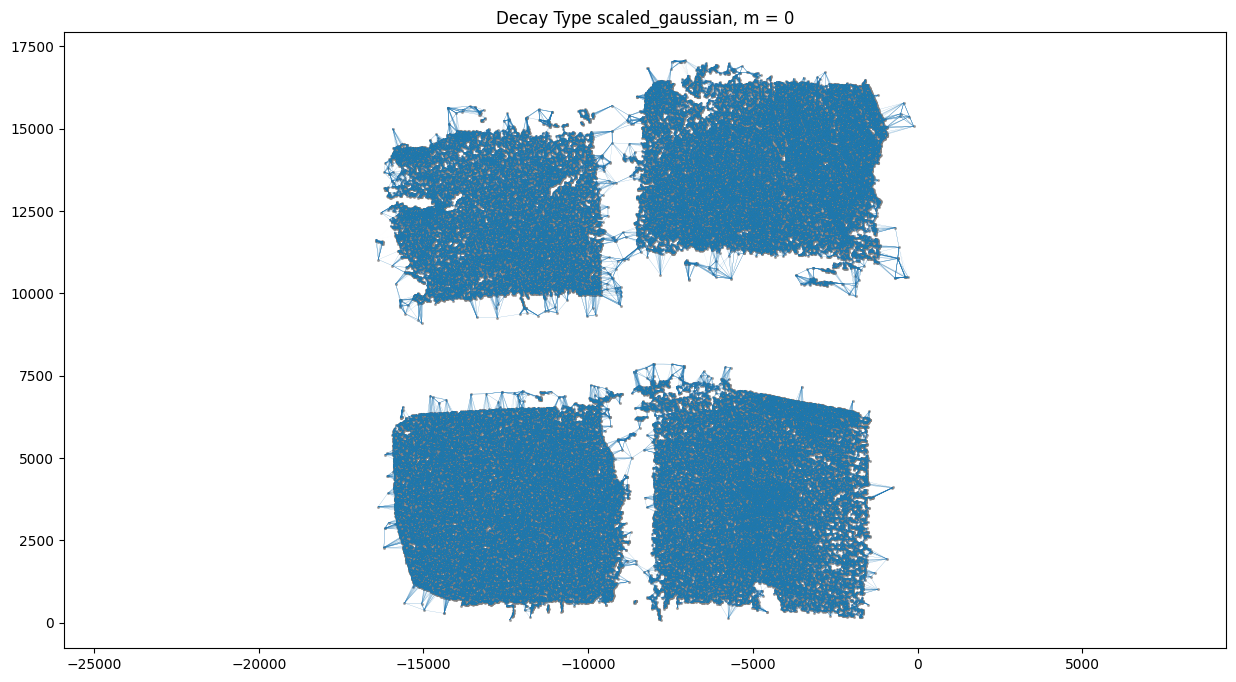

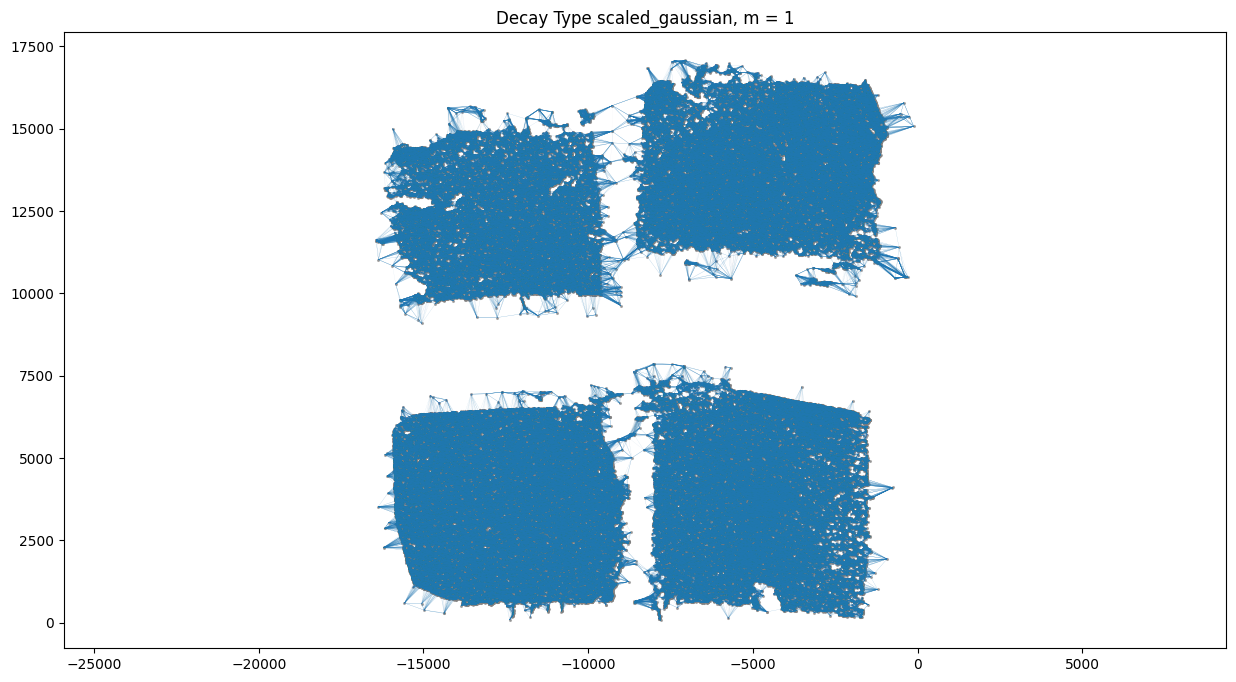

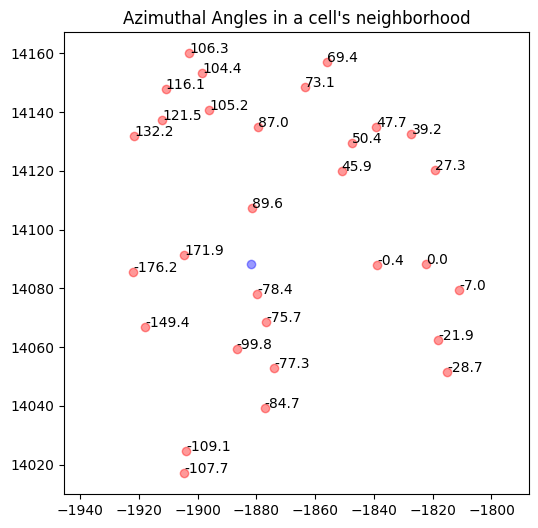

In [30]:
from banksy.initialize_banksy import initialize_banksy

banksy_dict = initialize_banksy(
    adata,
    coord_keys,
    k_geom,
    nbr_weight_decay=nbr_weight_decay,
    max_m=max_m,
    plt_edge_hist=True,
    plt_nbr_weights=True,
    plt_agf_angles=False, # takes long time to plot
    plt_theta=True,
)

In [31]:
from banksy.embed_banksy import generate_banksy_matrix

# The following are the main hyperparameters for BANKSY
resolutions = [0.2] # clustering resolution for UMAP
pca_dims = [20] # Dimensionality in which PCA reduces to
lambda_list = [0.8] # list of lambda parameters

banksy_dict, banksy_matrix = generate_banksy_matrix(adata, banksy_dict, lambda_list, max_m)

Runtime Jul-31-2025-13-40

920 genes to be analysed:
Gene List:
Index(['SLC2A3', 'CDK13', 'GADD45B', 'LGALS1', 'GZMB', 'PDYN', 'TIMP1',
       'CEMIP', 'CPQ', 'BLNK',
       ...
       'NRXN1', 'RYR3', 'HCN1', 'CFAP54', 'PLCB1', 'RMST', 'NCKAP5', 'ADGRV1',
       'SLC18A2', 'NDN'],
      dtype='object', length=920)

Decay Type: scaled_gaussian
Weights Object: {'weights': {0: <163903x163903 sparse matrix of type '<class 'numpy.float64'>'
	with 2458545 stored elements in Compressed Sparse Row format>, 1: <163903x163903 sparse matrix of type '<class 'numpy.complex128'>'
	with 4917090 stored elements in Compressed Sparse Row format>}}

Nbr matrix | Mean: 0.28 | Std: 0.79
Size of Nbr | Shape: (163903, 920)
Top 3 entries of Nbr Mat:

[[2.02796022 0.         0.20217113]
 [1.99779445 0.11459903 0.18868669]
 [2.18061396 0.10815716 0.17005861]]

AGF matrix | Mean: 0.1 | Std: 0.24
Size of AGF mat (m = 1) | Shape: (163903, 920)
Top entries of AGF:
[[0.0480093  0.         0.07543088]
 [0.60547721 0

In [32]:
from banksy_utils.umap_pca import pca_umap
pca_umap(banksy_dict,
         pca_dims = pca_dims,
         add_umap = True,
         plt_remaining_var = False,
         )

Current decay types: ['scaled_gaussian']

Reducing dims of dataset in (Index = scaled_gaussian, lambda = 0.8)

Setting the total number of PC = 20
Original shape of matrix: (163903, 2760)
Reduced shape of matrix: (163903, 20)
------------------------------------------------------------
min_value = -28.324631312343065, mean = 2.790790843199466e-15, max = 52.46502996059229

Conducting UMAP and adding embeddings to adata.obsm["reduced_pc_20_umap"]
UMAP embedding
------------------------------------------------------------
shape: (163903, 2)


AxisArrays with keys: reduced_pc_20, reduced_pc_20_umap


In [33]:
from banksy.cluster_methods import run_Leiden_partition

results_df, max_num_labels = run_Leiden_partition(
    banksy_dict,
    resolutions,
    num_nn = 50,
    num_iterations = -1,
    match_labels = True,
)

Decay type: scaled_gaussian
Neighbourhood Contribution (Lambda Parameter): 0.8
reduced_pc_20 

reduced_pc_20_umap 

PCA dims to analyse: [20]

Setting up partitioner for (nbr decay = scaled_gaussian), Neighbourhood contribution = 0.8, PCA dimensions = 20)


Nearest-neighbour weighted graph (dtype: float64, shape: (163903, 163903)) has 8195150 nonzero entries.
---- Ran find_nn in 363.25 s ----


Nearest-neighbour connectivity graph (dtype: int16, shape: (163903, 163903)) has 8195150 nonzero entries.

(after computing shared NN)
Allowing nearest neighbours only reduced the number of shared NN from 165444797 to 8170359.


Shared nearest-neighbour (connections only) graph (dtype: int16, shape: (163903, 163903)) has 7495411 nonzero entries.

Shared nearest-neighbour (number of shared neighbours as weights) graph (dtype: int16, shape: (163903, 163903)) has 7495411 nonzero entries.

sNN graph data:
[ 7  6  8 ... 12  7 10]

---- Ran shared_nn in 6.05 s ----


-- Multiplying sNN connectivity by

/home/erboone/pipeline/banksy/labels.py:398: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expand_labels(label_list[sort_indices[0]],


,decay,lambda_param,num_pcs,resolution,num_labels,labels,adata,relabeled
scaled_gaussian_pc20_nc0.80_r0.20,scaled_gaussian,0.8,20,0.2,8,"Label object:\nNumber of labels: 8, number of ...",[[[View of AnnData object with n_obs × n_vars ...,"Label object:\nNumber of labels: 8, number of ..."


In [34]:
results_df

,decay,lambda_param,num_pcs,resolution,num_labels,labels,adata,relabeled
scaled_gaussian_pc20_nc0.80_r0.20,scaled_gaussian,0.8,20,0.2,8,"Label object:\nNumber of labels: 8, number of ...",[[[View of AnnData object with n_obs × n_vars ...,"Label object:\nNumber of labels: 8, number of ..."


TypeError: stat: path should be string, bytes, os.PathLike or integer, not builtin_function_or_method

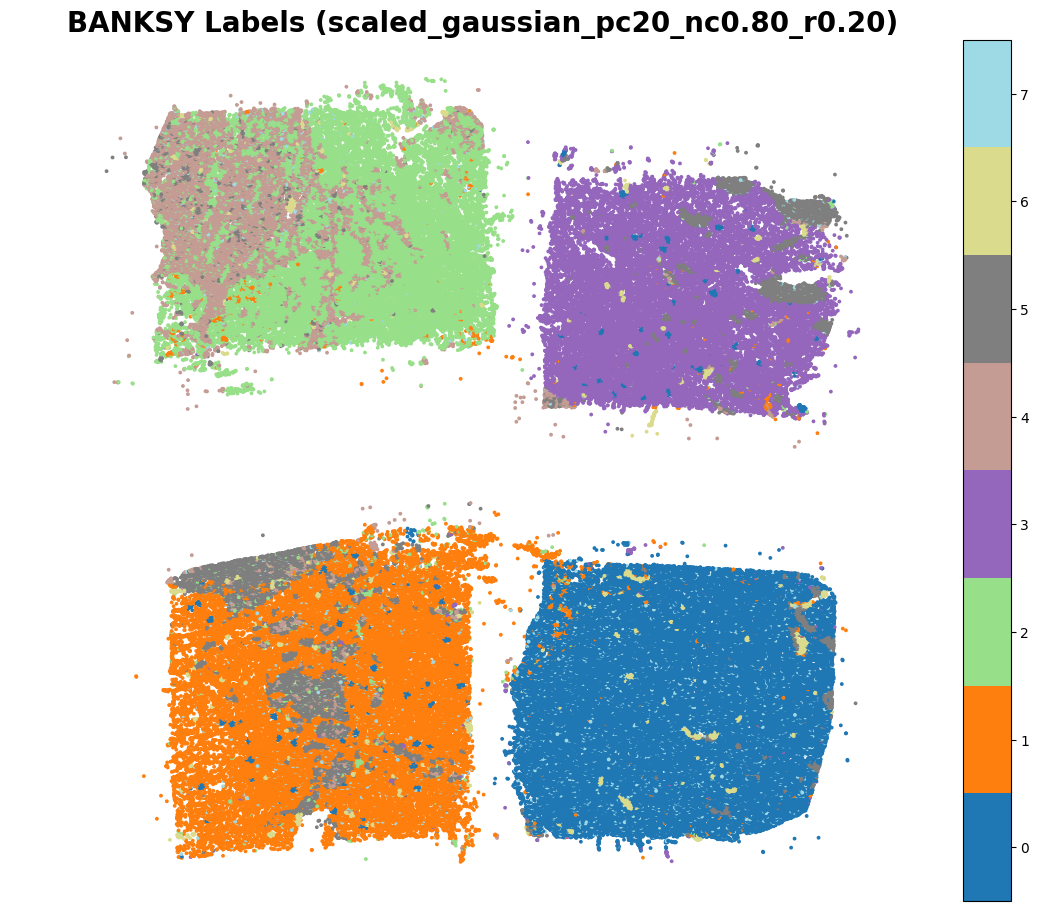

In [35]:
from banksy.plot_banksy import plot_results

c_map =  'tab20' # specify color map
weights_graph =  banksy_dict['scaled_gaussian']['weights'][0]

plot_results(
    results_df,
    weights_graph,
    c_map,
    match_labels = True,
    coord_keys = coord_keys,
    max_num_labels  =  max_num_labels, 
    save_path = dir,
    dataset_name = 'test',
    save_fig = True, # save the spatial map of all clusters
    save_seperate_fig = True, # save the figure of all clusters plotted seperately
)

In [ ]:
temp_adata = results_df.loc['scaled_gaussian_pc20_nc0.80_r0.20', 'adata']

In [37]:
labels = results_df.loc['scaled_gaussian_pc20_nc0.80_r0.20', 'labels']

In [ ]:
import pandas as pd

In [40]:
len(labels.dense)

163903

In [117]:
adata.obs['test'] = labels.dense
adata.obs['test'] = adata.obs['test'].astype('string') + '_banksy'


In [118]:
adata.obs['test'].unique()

<StringArray>
['1_banksy', '3_banksy', '0_banksy', '7_banksy', '5_banksy', '2_banksy',
 '4_banksy', '6_banksy']
Length: 8, dtype: string

In [119]:
temp_adata = adata.copy()
expression = sc.get.obs_df(temp_adata, keys=temp_adata.var_names.to_list() + ['test'])

In [120]:
temp_adata.obs['test']

cell
2851196300002100078    1_banksy
2851196300002100082    1_banksy
2851196300002100083    1_banksy
2851196300002100084    1_banksy
2851196300002100085    1_banksy
                         ...   
2851195900231100079    1_banksy
2851195900232100088    0_banksy
2851195900232100090    0_banksy
2851195900234100081    0_banksy
2851195900236100083    3_banksy
Name: test, Length: 163903, dtype: string

In [121]:
OLIGO_GENES = ["MROH9", "VCAN-AS1", "FMO6P", "FMO3", "BX284613.2", "AL512308.1", "LHFPL3-AS1", "Z94057.1", "AC004852.2", "LINC00402", "BX284613.2", "MROH9", "FMO6P", "PDGFRA", "VCAN", "FERMT1", "AL512308.1", "OLIG2", "AC004852.2", "COL9A1", "AC004852.2", "AL512308.1", "PDGFRA", "BX284613.2", "GPR17", "VCAN", "CSPG4", "AC117464.1", "OLIG2", "FERMT1", "AC004852.2", "PDGFRA", "GPNMB", "GPR17", "AL512308.1", "OLIG2", "COL20A1", "CSPG4", "OLIG1", "AC117464.1", "AC004852.2", "BX284613.2", "PDGFRA", "AL512308.1", "VCAN", "OLIG2", "OLIG1", "GPR17", "CSPG4", "FERMT1", "GPR17", "AL512308.1", "TNS3", "BCAS1", "MIR503HG", "AC008080.4", "NKX2-2", "GPNMB", "INAVA", "FIBIN", "GPR17", "AC008080.4", "FRG2DP", "AL512308.1", "MDFI", "LINC01447", "TNS3", "BCAS1", "ADAM33", "MIR503HG", "AC008080.4", "GPR17", "AC020909.2", "APCDD1", "ACAN", "DCT", "AC022433.1", "KANK2", "FRG2DP", "DOCK6", "OPALIN", "CD9", "AC020909.2", "MAL", "LINC00639", "AC110285.1", "PLLP", "LINC01170", "MAG", "SLCO1A2", "OPALIN", "LINC01608", "CD22", "CDH1", "FA2H", "LINC01099", "LINC01792", "MYRF", "LINC00639", "AC110285.1", "CNDP1", "LINC01608", "GREM1", "OPALIN", "FA2H", "AC110285.1", "MYRF", "CD22", "LINC01792", "LINC00906", "SLC5A11", "FA2H", "AL033523.1", "CD22", "AC012494.1", "MOBP", "MYRF", "SH3TC2-DT", "PRR5L", "CNDP1", "AC004690.2", "SLC5A11", "ITGA2", "AL033523.1", "LINC02882", "MOG", "FOLH1", "CARNS1", "LINC01949", "LRP2", "LINC01608", "OPALIN", "LINC01792", "SLCO1A2", "LINC02882", "FOLH1", "MAL", "ASPA", "AC108721.2", "SH3TC2", "CNDP1", "LINC01608", "OPALIN", "RNASE1", "LINC01792", "NKX6-2", "MAG", "PPP1R14A", "CD9", "TMEM98", "OPALIN", "LINC01608", "CD9", "LINC01792", "RNASE1", "CNDP1", "AC110285.1", "PLLP", "NKX6-2", "MAG", "AC061958.1", "PDE4B-AS1", "AL589787.1", "LINC01608", "MUSK", "AC103831.1", "AC026746.1", "OPALIN", "AC093330.1", "SPATA22", "MBOAT1", "AC110809.1", "AC008945.2", "S100A1", "AC114485.1", "AC007106.2", "LINC01445", "LINC01549", "AC004690.2", "S100B", "PTCSC3", "AC012494.2", "AL591115.1", "AC103831.1", "AC093330.1", "AL589787.1", "AC061958.1", "PDE4B-AS1", "AC026746.1", "AC108721.1"]
wm_markers = temp_adata.var_names.intersection(OLIGO_GENES)


In [122]:
adata

AnnData object with n_obs × n_vars = 163903 × 920
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'DAPI_raw', 'DAPI_high_pass', 'GAPDH_raw', 'GAPDH_high_pass', 'MBP_raw', 'MBP_high_pass', 'MAP2_raw', 'MAP2_high_pass', 'GFAP_raw', 'GFAP_high_pass', 'ACTB_raw', 'ACTB_high_pass', 'UBC_raw', 'UBC_high_pass', 'PolyT_raw', 'PolyT_high_pass', 'region', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'blank_counts', 'misid_rate', 'counts_per_volume', '_BATCH', '_CELLTYPE', 'fov_y', 'fov_x', 'global_x', 'global_y', 'test'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'blank_names', 'current_log', 'dataset_name', 'past_logs'
    obsm: 'X_blanks', 'X_spatial'
    layers: 'counts'

In [123]:
adata.obs['test']

cell
2851196300002100078    1_banksy
2851196300002100082    1_banksy
2851196300002100083    1_banksy
2851196300002100084    1_banksy
2851196300002100085    1_banksy
                         ...   
2851195900231100079    1_banksy
2851195900232100088    0_banksy
2851195900232100090    0_banksy
2851195900234100081    0_banksy
2851195900236100083    3_banksy
Name: test, Length: 163903, dtype: string

In [128]:
wm_genes = expression.groupby(by='test').mean()[wm_markers]
wm_clust = wm_genes.idxmax().mode()
adata.obs['test'] = adata.obs['test'].astype('category')
dend = sc.tl.dendrogram(adata, groupby='test', inplace=False)
wm_ind = int(wm_clust[0].split('_')[0])
all_wm_clust = [f"{i}_banksy" for i,x in enumerate(dend['correlation_matrix'][wm_ind] > .7) if x]
print(all_wm_clust)
adata.obs['test'] = adata.obs['test'].cat.add_categories('white_matter')
adata.obs.loc[adata.obs['test'].isin(all_wm_clust), 'test'] = 'white_matter'
adata.obs['test'] = adata.obs['test'].cat.remove_unused_categories()


/home/erboone/miniforge3/envs/pipebase/lib/python3.11/site-packages/scanpy/tools/_dendrogram.py:105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[group]):
/home/erboone/miniforge3/envs/pipebase/lib/python3.11/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


ValueError: Distance matrix 'X' must be symmetric.

In [126]:
wm_genes

,PDGFRA,S100B,CSPG4,COL9A1,VCAN,CNDP1,BCAS1,MOBP,MAG,TNS3,LRP2,GPR17,SLC5A11,OPALIN
test,,,,,,,,,,,,,,
0_banksy,0.213793,2.283862,0.061378,0.107780,0.299232,0.455231,0.141907,0.445877,0.517689,0.097960,0.064840,0.254573,0.097051,0.819523
1_banksy,0.180720,1.849299,0.095358,0.133427,0.252331,0.304421,0.201818,0.175589,0.386261,0.067217,0.033441,0.411149,0.023278,0.468471
2_banksy,0.148224,2.079910,0.082984,0.182936,0.305709,0.056163,0.635572,0.082540,0.108880,0.071574,0.013263,0.613937,0.008521,0.227170
3_banksy,0.248499,1.458022,0.039666,0.128529,0.243916,0.946544,0.269143,0.640818,0.933971,0.060594,0.045384,0.265655,0.035529,1.260099
4_banksy,0.012570,0.786983,0.009142,0.029867,0.055319,0.055683,1.447953,0.096198,0.124039,0.004363,0.006960,0.140349,0.008571,0.331914
5_banksy,0.096889,1.289399,0.043673,0.138206,0.298460,1.658351,1.549683,1.163636,2.041740,0.019571,0.216370,0.440652,0.299185,2.220719
6_banksy,0.046353,0.407455,0.170502,0.030146,0.078768,0.127391,0.135170,0.082658,0.113128,0.028201,0.037601,0.041167,0.019773,0.143598
7_banksy,0.089812,2.264821,0.017394,0.023429,0.109336,0.069223,0.626553,0.080937,0.097267,0.139155,0.020234,0.146965,0.030174,0.255591


/home/erboone/miniforge3/envs/pipebase/lib/python3.11/site-packages/scanpy/tools/_dendrogram.py:105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[group]):
/home/erboone/miniforge3/envs/pipebase/lib/python3.11/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


In [63]:
ranked = sc.tl.rank_genes_groups(temp_adata, 'test', copy=True)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/erboone/miniforge3/envs/pipebase/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/erboone/miniforge3/envs/pipebase/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/erboone/miniforge3/envs/pipebase/lib/python3.11/site-packages/scanpy/tools/_dendrogram.py:105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isins

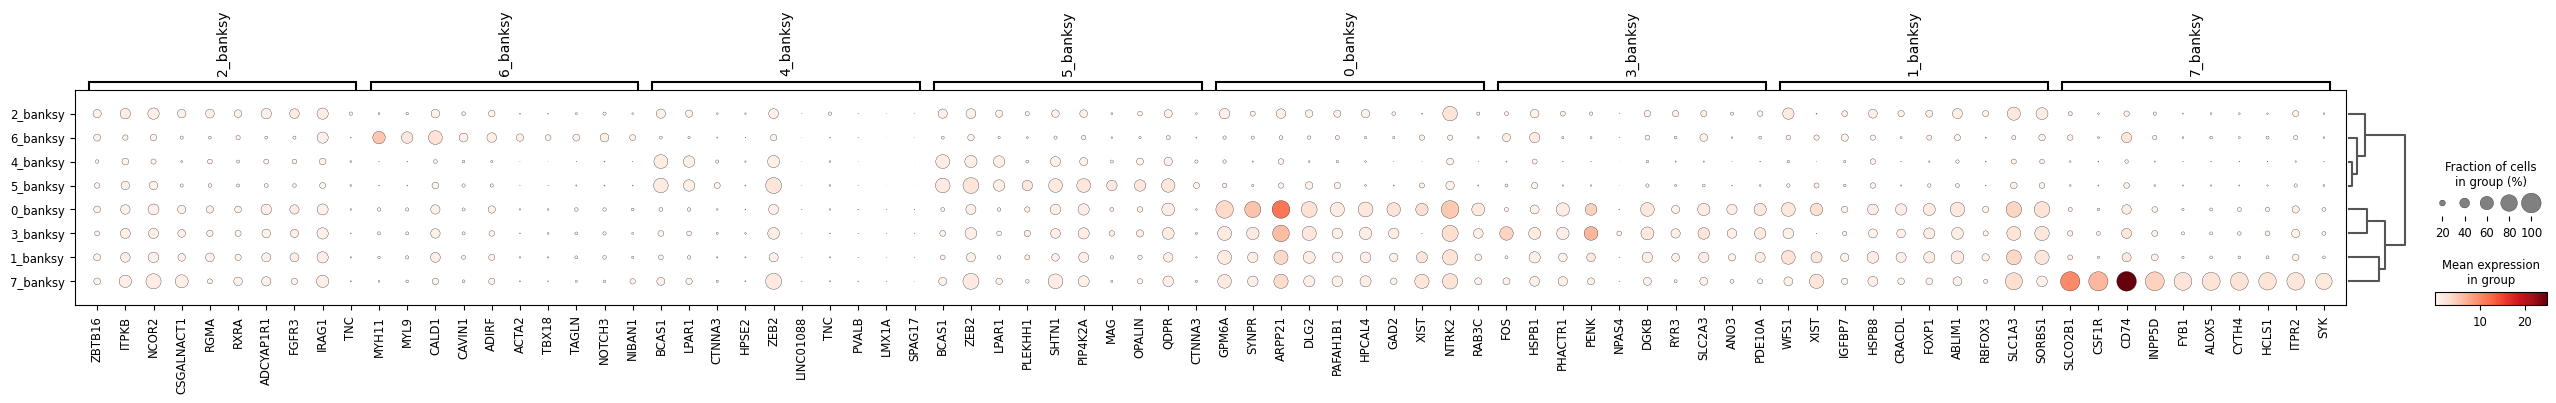

In [64]:
sc.pl.rank_genes_groups_dotplot(ranked)

/home/erboone/miniforge3/envs/pipebase/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/erboone/miniforge3/envs/pipebase/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/erboone/miniforge3/envs/pipebase/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


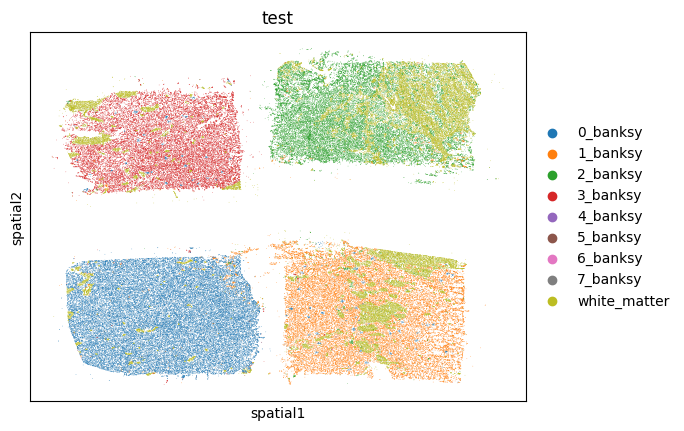

In [127]:
sc.pl.embedding(adata, basis='spatial', color='test')

/home/erboone/miniforge3/envs/pipebase/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


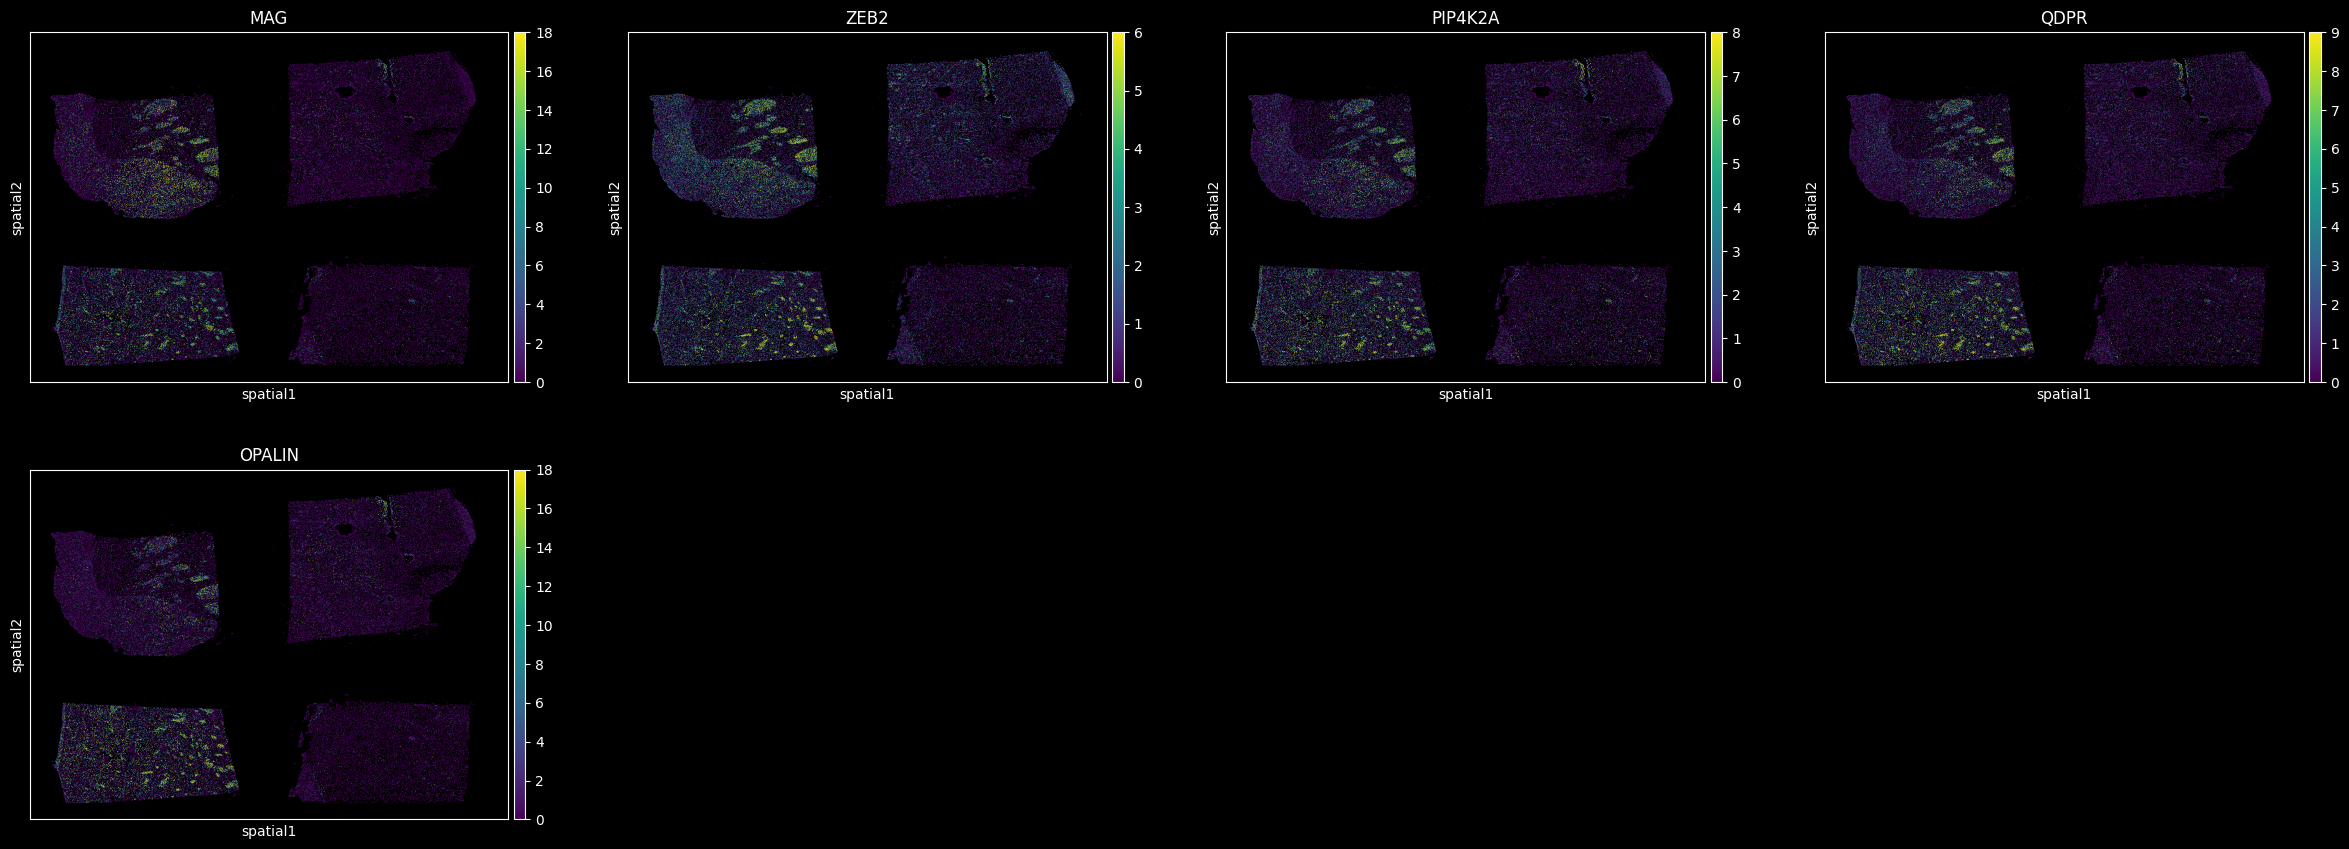

In [158]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# adata.obsm.pop('X_blanks')
cts_adata = adata.copy()
cts_adata.X = cts_adata.layers['counts']
sc.pl.embedding(adata, basis='spatial', color=['MAG', 'ZEB2', 'PIP4K2A', 'QDPR', 'OPALIN'], vmax='p99')

array([2, 2, 2, ..., 0, 2, 1], dtype=int32)

In [18]:
labels.get_onehot()

<8x176507 sparse matrix of type '<class 'numpy.int32'>'
	with 176507 stored elements in Compressed Sparse Row format>

In [ ]:
temp_adata.obs

AnnData object with n_obs × n_vars = 176507 × 2760
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'GFAP_raw', 'GFAP_high_pass', 'GAPDH_raw', 'GAPDH_high_pass', 'MAP2_raw', 'MAP2_high_pass', 'PolyT_raw', 'PolyT_high_pass', 'MBP_raw', 'MBP_high_pass', 'DAPI_raw', 'DAPI_high_pass', 'ACTB_raw', 'ACTB_high_pass', 'UBC_raw', 'UBC_high_pass', 'region', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'blank_counts', 'misid_rate', 'counts_per_volume', '_BATCH', '_CELLTYPE', 'fov_y', 'fov_x', 'global_x', 'global_y'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'is_nbr', 'k'
    obsm: 'reduced_pc_20', 'reduced_pc_20_umap'

In [151]:
adata

AnnData object with n_obs × n_vars = 94621 × 920
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'GFAP_raw', 'GFAP_high_pass', 'GAPDH_raw', 'GAPDH_high_pass', 'MAP2_raw', 'MAP2_high_pass', 'PolyT_raw', 'PolyT_high_pass', 'MBP_raw', 'MBP_high_pass', 'DAPI_raw', 'DAPI_high_pass', 'ACTB_raw', 'ACTB_high_pass', 'UBC_raw', 'UBC_high_pass', 'region', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'blank_counts', 'misid_rate', 'counts_per_volume', '_BATCH', '_CELLTYPE', 'fov_y', 'fov_x', 'global_x', 'global_y', 'test', 'n_counts', 0
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'blank_names', 'current_log', 'dataset_name', 'past_logs', 'rank_genes_groups'
    obsm: 'X_blanks', 'X_spatial'
    layers: 'counts'